<a href="https://colab.research.google.com/github/Mikalaj-Plck/Transfer_Learning/blob/main/GB_TransferLerning_S3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Упрощаем использование TL. Фреймворк Huggingface

## Первый семинар

![image.png](attachment:image.png)

## Второй семинар

![fdbd6488-6edc-4a18-8070-7f587f38bc92.jfif](attachment:fdbd6488-6edc-4a18-8070-7f587f38bc92.jfif)

Вы уже получили представление, с чего начинается проект с нейросетями или откуда брать эмбеддинги.

- Например, вы можете взять Colab и создать поисковик по изображениям: https://blog.roboflow.com/clip-image-search-faiss/.
- Или можете создать рекомендательныю систему по текстовым описаниям товаров: https://www.kaggle.com/code/andrzejpackard/bert-and-faiss-for-recomendation-engine

Следующий шаг – упростить себе работу с широчайшим перечнем предобученных моделей.

Нам понадобится библиотека transformers.

In [ ]:
!pip install transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 9.7 MB/s eta 0:00:0000:0100:01m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 10.0 MB/s eta 0:00:00a 0:00:01


## Почему трансформеры?

- Не простые эмбеддинги, а позиционные (часть слова + положение в последовательности)
- 10-20 одинаковых модулей, которые постоянно рассылают друг другу "запросы"
- Каждый модуль практически равен строчке кода в программе (хотя может делать гораздо более сложные вещи)
- Очень эффективно вычисляется и распараллеливается

В предшествующих (реккурентных) сетях обучение и вычисление велось по цепочке. Тут все параллельно.

* GPT3 учитывал 8000.
* GPT4 учитывает 32000 токенов в качестве контекста (объем маленькой книги).
* Flash attention – 64000 (среднего размера книга)

![image.png](attachment:image.png)

https://www.youtube.com/watch?v=NzLwHcqE6Jw

Зато... трансформеры требуют огромного количества памяти.

* _Stable Diffusion_ – модели от 10 Гб и больше
* _GPT_... давайте посмотрим на сайте

# Что такое Huggingface

* Сотни тысяч предобученных моделей
* Очень много датасетов (как и в kaggle, и в Google Dataset Search)
* HF Spaces

Пройдемся по https://huggingface.co/

Когда нужно хранить модель локально, а когда лучше пользоваться API?

## Примеры кода (pipeline)

Объекты Pipeline: https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/pipelines

Демо чат-бота:

- https://huggingface.co/tasks/conversational
- https://huggingface.co/docs/transformers/v4.35.2/en/main_classes/pipelines#transformers.ConversationalPipeline

```python
from transformers import pipeline, Conversation

chatbot = pipeline(model="microsoft/DialoGPT-medium")
conversation = Conversation("Going to the movies tonight - any suggestions?")
conversation = chatbot(conversation)
conversation.generated_responses[-1]
>>> 'The Big Lebowski'

conversation.add_user_input("Is it an action movie?")
conversation = chatbot(conversation)
conversation.generated_responses[-1]
>>> "It's a comedy."
```

Онлайн-демо: https://huggingface.co/spaces/shawhin/vanilla-chatbot

# Задачи компьютерного зрения

* Оценка карты глубины по фотографии: https://huggingface.co/blog/cv_state#support-for-pipelines
* Классификация изображений
* Сегментация изображений
* Перевод изображения в изображение
* Детекция объектов
* Классификация видео
* Классификация без заранее определенных меток (ZeroShot Classification)

Перечень задач: https://huggingface.co/docs/transformers/main/en/main_classes/pipelines#computer-vision

No model was supplied, defaulted to Intel/dpt-large and revision bc15f29 (https://huggingface.co/Intel/dpt-large).
Using a pipeline without specifying a model name and revision in production is not recommended.
Some weights of DPTForDepthEstimation were not initialized from the model checkpoint at Intel/dpt-large and are newly initialized: ['neck.fusion_stage.layers.0.residual_layer1.convolution1.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution1.weight', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.bias', 'neck.fusion_stage.layers.0.residual_layer1.convolution2.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use mps:0


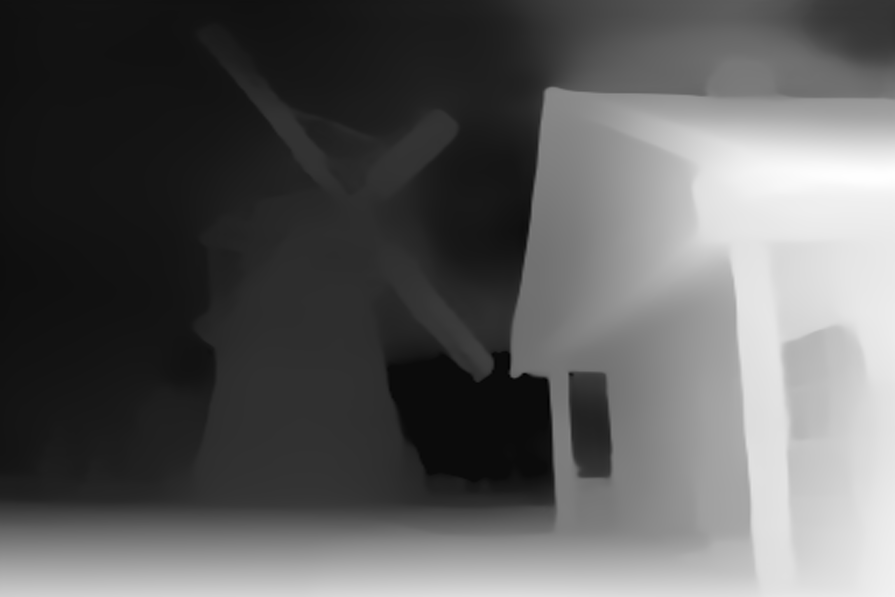

In [ ]:
from transformers import pipeline

depth_estimator = pipeline(task="depth-estimation") # model="Intel/dpt-large"
output = depth_estimator("/Users/yezutmichael/Programming/GB_Transfer_Learning/view.jpg")

# Вызов этой команды возвращает нам тензор, в котором дана оценочная информация
# об удаленности каждого объекта от зрителя (в метрах)
output["depth"]

Генерация изображений там тоже есть, но, как было сказано, диффузионные модели занимают огромное пространство в памяти.

In [ ]:
#!pip install diffusers

#from diffusers import DiffusionPipeline
#generator = DiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4")
#generator.to("cuda")
#image = generator("An image of a squirrel in Picasso style").images[0]

# Поработаем с текстом

Модели, понимающий русский язык: https://huggingface.co/models?language=ru

Например, поищем русские модели для перевода текста в речь: https://huggingface.co/docs/transformers/tasks/text-to-speech

In [ ]:
from transformers import pipeline

question_answerer = pipeline(
    "question-answering",
    model="Den4ikAI/rubert-large-squad",
    tokenizer="Den4ikAI/rubert-large-squad"
)

config.json:   0%|          | 0.00/712 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/713M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/43.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.78M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/713M [00:00<?, ?B/s]

Device set to use mps:0


In [ ]:
context = """Бенджамин Франклин родился 17 января 1706 года в Бостоне, штат Массачусетс, и был пятнадцатым ребенком в семье ремесленника Джосайи Франклина [1, 3]. Он был американским политическим деятелем, дипломатом, изобретателем, ученым, философом, писателем, журналистом, издателем и масоном [2, 4, 5, 6].
Франклин был одним из отцов-основателей США и единственным, кто подписал все три важнейших исторических документа, лежащих в основе образования Соединенных Штатов Америки как независимого государства: Декларацию независимости, Конституцию США и Версальский мирный договор 1783 года [3, 4].
Франклин был разносторонне развитым человеком. Он был не только политиком, но и изобретателем, ученым, журналистом и писателем [5, 6, 7]. В 1728 году он основал Филадельфийский дискуссионный кружок, который позже стал Американским философским обществом [1, 2]. В 1731 году он основал первую в США публичную библиотеку [1, 2]. Также, Франклин был одним из основателей Филадельфийской академии, которая позже стала Пенсильванским университетом [1, 6].
Бенджамин Франклин был также известен своими изобретениями, такими как бифокальные очки, кресло-качалка и громоотвод [1, 6]. Он также изучал природу молнии и занимался физикой, в основном электростатикой, электричеством и магнетизмом [6].
Франклин представлял интересы четырех американских штатов в Великобритании в течение 13 лет, начиная с 1757 года [5]. Он был делегатом Второго континентального конгресса в 1775 году, участвовал в разработке Декларации независимости и был назначен первым генеральным почтмейстером США в 1776 году [4, 5].
Франклин был отправлен во Францию в 1776 году в качестве посла для заключения союза против Великобритании. Благодаря его усилиям, Франция признала независимость Америки в 1778 году [4, 5]. Он также участвовал в переговорах с Великобританией, которые привели к подписанию Версальского договора в 1783 году [5].
В основе политических воззрений Франклина лежала концепция естественных и неотъемлемых прав человека, таких как жизнь, свобода и собственность [2, 4]. Сначала он рассматривал колонии как часть Британской империи, затем пришел к идее федерального устройства, а затем стал сторонником полного отделения от метрополии и провозглашения независимости [2, 4]. Он также выступал против усиления исполнительной власти, за всеобщее избирательное право и был противником рабства [4].
Бенджамин Франклин умер 17 апреля 1790 года [1, 4].
"""

In [ ]:
result = question_answerer(question="Кто такой Бенжамин Франклин?", context=context)
print( result['answer'] )

ученым, философом, писателем, журналистом, издателем и масоном


In [ ]:
result

{'score': 0.03368566930294037,
 'start': 220,
 'end': 282,
 'answer': 'ученым, философом, писателем, журналистом, издателем и масоном'}

In [ ]:
result = question_answerer(question="Каким по счету ребенком был Бенжамин Франклин?", context=context)
print( result['answer'] )

пятнадцатым


In [ ]:
result

{'score': 0.9420652985572815, 'start': 82, 'end': 93, 'answer': 'пятнадцатым'}

# Домашнее задание

Реализуйте классификацию эмоциональной окрашенности текстов при помощи объекта pipeline.

1. Найдите тип задач Sentiment Analysis на huggingface.co
2. Найдите модель для русского языка (примеры: rubert-tiny2..., rubert-base...)

In [ ]:
from transformers import pipeline

pipe = pipeline("text-classification", model="tabularisai/multilingual-sentiment-analysis")

config.json:   0%|          | 0.00/902 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/541M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.20k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.92M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use mps:0


Выполните следующую ячейку. Если вы правильно инициализировали `pipeline`, вы получите относительно верные предсказания.

In [ ]:
sentence = (
    [
        "Отличный товар, полностью соответствует описанию, рекомендую!",
        "Очень довольна покупкой, качество на высоте, буду заказывать ещё.",
        "Товар пришел быстро, хорошо упакован, всё работает отлично.",
        "Не ожидал такого качества за эти деньги, приятно удивлен.",
        "Всё супер, товар полностью оправдал мои ожидания, спасибо!",
        "Хороший товар, но немного не соответствует моим требованиям.",
        "Товар неплохой, но есть небольшие недочеты, нужно доработать.",
        "Качество так себе, ожидал большего, немного разочарован.",
        "Товар пришел поврежденным, нужно заменить, очень расстроена.",
        "Ужасный товар, не рекомендую никому, деньги на ветер."
    ]
)

result = pipe(sentence)
print(result)

[{'label': 'Very Positive', 'score': 0.7265405654907227}, {'label': 'Very Positive', 'score': 0.6019097566604614}, {'label': 'Very Positive', 'score': 0.6526122093200684}, {'label': 'Positive', 'score': 0.5366246104240417}, {'label': 'Very Positive', 'score': 0.6726282238960266}, {'label': 'Neutral', 'score': 0.4620821177959442}, {'label': 'Neutral', 'score': 0.6009088158607483}, {'label': 'Negative', 'score': 0.35141634941101074}, {'label': 'Negative', 'score': 0.4075813293457031}, {'label': 'Very Negative', 'score': 0.8360888957977295}]


# Как запустить сервис на основе модели?

Например, в Gradio:

1. https://huggingface.co/spaces/gradio/chatbot
2. https://www.kdnuggets.com/2023/06/build-ai-chatbot-5-minutes-hugging-face-gradio.html

Или в Huggingface Spaces: https://huggingface.co/spaces

# И напоследок поработаем с кодом

In [ ]:
from transformers import pipeline

fill_mask = pipeline(
    "fill-mask",
    model="huggingface/CodeBERTa-small-v1",
    tokenizer="huggingface/CodeBERTa-small-v1"
)

config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/336M [00:00<?, ?B/s]

Some weights of the model checkpoint at huggingface/CodeBERTa-small-v1 were not used when initializing RobertaForMaskedLM: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/19.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/994k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/483k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/336M [00:00<?, ?B/s]

Device set to use mps:0


In [ ]:
# python_code = """
# # a list of numbers
# my_numbers = [10, 8, 3, 22, 33, 7, 11, 100, 54]
# my_numbers.<mask>


# """
python_code = """
# calculator
set_numbers = [2, 10, 23, 235]
set_numbers.<mask>
"""

In [ ]:
fill_mask( python_code )

[{'score': 0.0808456614613533,
  'token': 1408,
  'token_str': 'update',
  'sequence': '\n# calculator\nset_numbers = [2, 10, 23, 235]\nset_numbers.update\n'},
 {'score': 0.07690172642469406,
  'token': 3783,
  'token_str': 'reset',
  'sequence': '\n# calculator\nset_numbers = [2, 10, 23, 235]\nset_numbers.reset\n'},
 {'score': 0.048172272741794586,
  'token': 3059,
  'token_str': 'clear',
  'sequence': '\n# calculator\nset_numbers = [2, 10, 23, 235]\nset_numbers.clear\n'},
 {'score': 0.03192344680428505,
  'token': 5648,
  'token_str': 'reverse',
  'sequence': '\n# calculator\nset_numbers = [2, 10, 23, 235]\nset_numbers.reverse\n'},
 {'score': 0.029983755201101303,
  'token': 6827,
  'token_str': 'initialize',
  'sequence': '\n# calculator\nset_numbers = [2, 10, 23, 235]\nset_numbers.initialize\n'}]

# Библиография

https://colab.research.google.com/github/huggingface/notebooks/blob/master/transformers_doc/task_summary.ipynb#scrollTo=QGwpVScF2kZO

https://huggingface.co/huggingface/CodeBERTa-small-v1

https://huggingface.co/spaces/codeparrot/code-generation-models